# 2.3 Skills/Wrangling with 🐼

In this notebook, we will focus on one skill in data analysis, namely the ability to add select, aggregate and transform data in a dataframe.

### Imports

In [1]:
import pandas as pd

### Load dataset

Let's read in a CSV file containing an export of [Elon Musk's tweets](https://twitter.com/elonmusk), exported from Twitter's API. 

In [34]:
dataset_path = '../data/musk_tweets/elonmusk_tweets.csv'
df = pd.read_csv(dataset_path)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2819 non-null   int64 
 1   created_at  2819 non-null   object
 2   text        2819 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


In [10]:
df.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


Let's give this dataset a bit more structure:
- the `id` column can be transformed into the dataframe's index, thus enabling us e.g. to select a tweet by id;
- `created_at` contains a timestamp, thus it can easily be converted into a `datetime` value

In [35]:
df.set_index('id', drop=True, inplace=True)

In [36]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 849636868052275200 to 15434727182
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2819 non-null   datetime64[ns]
 1   text        2819 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 66.1+ KB


### Selection

#### Renaming columns

An operation on dataframes that you'll find yourself doing very often is to rename the columns. 

The first way of renaming columns is by manipulating directly the dataframe's index via the `columns` property.

We can change the column names by assigning to `columns` a list having as values the new column names.

**NB**: the size of the list and new number of colums must match!

In [18]:
df.columns

Index(['created_at', 'text'], dtype='object')

In [38]:
df.columns = ['created_at','text_tweet']

In [20]:
# let's check that the change did take place
df.head()

,created_at,text_tweet
id,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


The second way of renaming colums is to use the method `rename()` of a dataframe. The `columns` parameter takes a dictionary of mappings between old and new column names.

```python
mapping_dict = {
    "old_column_name": "new_column_name"
}
```

In [39]:
# let's change column `text` => `tweet`
df = df.rename(columns={"text_tweet": "tweet"})

In [22]:
df.head()

,created_at,tweet
id,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


**Question**: in which cases is it more convenient to use the second method over the first?

#### Selecting columns

In [23]:
# this selects one single column and returns as a Series
df["created_at"].head()

id
849636868052275200   2017-04-05 14:56:29
848988730585096192   2017-04-03 20:01:01
848943072423497728   2017-04-03 16:59:35
848935705057280001   2017-04-03 16:30:19
848416049573658624   2017-04-02 06:05:23
Name: created_at, dtype: datetime64[ns]

In [24]:
type(df["created_at"])

pandas.core.series.Series

In [25]:
# whereas this syntax selects one single column
# but returns a Dataframe
df[["created_at"]].head()

,created_at
id,
849636868052275200,2017-04-05 14:56:29
848988730585096192,2017-04-03 20:01:01
848943072423497728,2017-04-03 16:59:35
848935705057280001,2017-04-03 16:30:19
848416049573658624,2017-04-02 06:05:23


In [26]:
type(df[["created_at"]])

pandas.core.frame.DataFrame

### Transformation


The two main functions used to manipulate and transform values in a dataframe are:
- `map()`
- `apply()`

In this section we'll be using both to enrich our datasets with useful information (useful for exploration, for later visualizations, etc.).

#### Add link to original tweet

The `map()` method can be called on a column, as well as on the dataframe's index.

When passed as a parameter to `map`, the functional programming-stlye function `lambda` can be used to transform any value from that column into another one.   

In [27]:
df.index

Index([849636868052275200, 848988730585096192, 848943072423497728,
       848935705057280001, 848416049573658624, 848415731502923777,
       848415356263702528, 848398971139629057, 848244577521647616,
       848243350993895424,
       ...
       149441101684686848, 149439686702661632, 149436471764459520,
       149435658115612672, 143171132814671872, 142881284019060736,
       142880871391838208, 142188458125963264, 142179928203460608,
              15434727182],
      dtype='int64', name='id', length=2819)

In [40]:
df['tweet_link'] = df.index.map(lambda x: f'https://twitter.com/i/web/status/{x}')

In [49]:
pd.set_option("display.max_colwidth", 10000)

def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

df.head().style.format({'tweet_link': make_clickable})

# to apply the style to the entire dataframe just remove
# `.head` from the line above

,created_at,tweet,tweet_link
id,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728
848935705057280000,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624


#### Add colums with mentions

In [112]:
import re

def find_mentions(tweet_text):
    handle_regexp = r'@[a-zA-Z0-9_]{1,15}'
    if len(re.findall(handle_regexp, tweet_text)) > 0:
        return ", ".join(re.findall(handle_regexp, tweet_text))
    else:
        return None

In [113]:
df['tweet'].apply(find_mentions)

id
849636868052275200                                           None
848988730585096192    @ForIn2020, @waltmossberg, @mims, @defcon_5
848943072423497728                @waltmossberg, @mims, @defcon_5
848935705057280001                                           None
848416049573658624                            @DaveLeeBBC, @verge
                                         ...                     
142881284019060736                                           None
142880871391838208                                           None
142188458125963264                                           None
142179928203460608                                           None
15434727182                                                  None
Name: tweet, Length: 2819, dtype: object

In [114]:
df['tweet_mentions'] = df['tweet'].apply(find_mentions)

In [131]:
df['n_mentions'] = df['tweet_mentions'].map(lambda x: len(x.split(',')) if x is not None else 0)

In [132]:
df.head()

,created_at,tweet,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,None,0,Wednesday,2
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4,Monday,0
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"@waltmossberg, @mims, @defcon_5",3,Monday,0
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,None,0,Monday,0
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624,"@DaveLeeBBC, @verge",2,Sunday,6


#### Add column with week day

In [133]:
df["week_day_name"] = df['created_at'].dt.day_name()

In [134]:
df["week_day"] = df['created_at'].dt.weekday

In [135]:
df.head(3)

,created_at,tweet,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,None,0,Wednesday,2
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4,Monday,0
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"@waltmossberg, @mims, @defcon_5",3,Monday,0


###  Selecting rows

Filtering rows in `pandas` is done by means of `[ ]`, which can contain the row number as well as a condition for the selection.

In [136]:
df[2:4]
# equivalent to df.iloc[2:4]

,created_at,tweet,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day
id,,,,,,,
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"@waltmossberg, @mims, @defcon_5",3,Monday,0
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,None,0,Monday,0


Or all rows up to a certain row number:

In [137]:
df[:4]
# equivalent to df.iloc[:4]

,created_at,tweet,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,None,0,Wednesday,2
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4,Monday,0
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"@waltmossberg, @mims, @defcon_5",3,Monday,0
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,None,0,Monday,0


In [138]:
df.shape

(2819, 7)

In [139]:
# equivalent of `df.query('n_mentions > 0')`

len(df[df['n_mentions'] > 0])

1674

In [140]:
df[df['n_mentions'] >= 0].shape

(2819, 7)

#### Strings

In [141]:
df[df['week_day_name'] == 'Saturday'].shape

(426, 7)

In [142]:
df[df['week_day_name'].str.startswith('S')].shape

(848, 7)

#### Multiple conditions

In [143]:
# AND condition with `&`

df[
    (df['week_day_name'] == 'Saturday') & (df['n_mentions'] == 0)
].shape

# equivalent to df.query("week_day_name == 'Saturday' and n_mentions == 0")

(187, 7)

In [145]:
# OR condition with `|`

df[
    (df['week_day_name'] == 'Saturday') | (df['n_mentions'] == 0)
].shape

(1384, 7)

#### Add column with day hour

In [147]:
# df.created_at.dt?

In [148]:
df['created_at'].dt.hour.head()

id
849636868052275200    14
848988730585096192    20
848943072423497728    16
848935705057280001    16
848416049573658624     6
Name: created_at, dtype: int32

In [149]:
df["day_hour"] = df['created_at'].dt.hour

In [150]:
display_cols = ['created_at', 'week_day', 'day_hour']
df[display_cols].head(4)

,created_at,week_day,day_hour
id,,,
849636868052275200,2017-04-05 14:56:29,2,14
848988730585096192,2017-04-03 20:01:01,0,20
848943072423497728,2017-04-03 16:59:35,0,16
848935705057280001,2017-04-03 16:30:19,0,16


### Aggregation

(Figure taken from W. Mckinney's *Python for Data Analysis* 2013, p. 252)

<img src='figures/groupby-mechanics.png' width='600px'>

In [151]:
df.columns

Index(['created_at', 'tweet', 'tweet_link', 'tweet_mentions', 'n_mentions',
       'week_day_name', 'week_day', 'day_hour'],
      dtype='object')

In [153]:
df.agg({'n_mentions': ['min', 'max', 'sum', 'mean']})

,n_mentions
min,0.000000
max,6.000000
sum,2277.000000
mean,0.807733


#### Grouping

In [179]:
# df.groupby?

In [182]:
grp_by_day = df.groupby('week_day')

In [183]:
type(grp_by_day)

pandas.core.groupby.generic.DataFrameGroupBy

The object returned by `gropuby` is a `DataFrameGroupBy` **not** a normal `DataFrame`.

However, some methods of the latter work also on the former, e.g. `head` and `tail`

In [ ]:
# the head of a DataFrameGroupBy consists of the first
# n records for each group (see `help(grp_by_day.head)`)

grp_by_day.head(1)

`agg` is used to pass an aggregation function to be applied to each group resulting from `groupby`.

In [165]:
# here we are interested in how many tweets
# there are for each group, so we pass `len()`

grp_by_day.agg(len)

,created_at,tweet,tweet_link,tweet_mentions,n_mentions,week_day_name,day_hour
week_day,,,,,,,
0,315,315,315,315,315,315,315
1,385,385,385,385,385,385,385
2,380,380,380,380,380,380,380
3,361,361,361,361,361,361,361
4,530,530,530,530,530,530,530
5,426,426,426,426,426,426,426
6,422,422,422,422,422,422,422


In [219]:
# however, we are not interested in having the count for all
# columns. rather we want to create a new dataframe with renamed
# column names

grp_by_day.agg({'tweet': len}).rename({'tweet': 'count'}, axis='columns')

# equivalent: grp_by_day['tweet'].count().to_frame().rename({'tweet':'count'},axis='columns')
# OR: grp_by_day[['tweet']].count().rename({'tweet':'count'},axis='columns')

,count
week_day,
0,315
1,385
2,380
3,361
4,530
5,426
6,422


##### By label (column)

Previously we've added a column indicating on which day of the week a given tweet appeared.

In [206]:
grpby_result_as_series = df.groupby('day_hour')['tweet'].count()

In [208]:
grpby_result_as_series

day_hour
0     144
1     183
2     119
3     104
4      98
5      81
6      85
7      94
8      82
9      55
10     34
11     15
12     17
13     23
14    114
15    190
16    198
17    190
18    162
19    154
20    176
21    192
22    168
23    141
Name: tweet, dtype: int64

In [177]:
grpby_result_as_df = df.groupby('day_hour')[['tweet']]\
    .count()\
    .rename({'tweet': 'count'}, axis='columns')

In [178]:
grpby_result_as_df.head()

,tweet
day_hour,
0,144
1,183
2,119
3,104
4,98


##### By series or dict

In [209]:
# df.groupby?

In [212]:
for group, rows in df.groupby(df['created_at'].dt.day):
    print(group, type(rows))

1 <class 'pandas.core.frame.DataFrame'>
2 <class 'pandas.core.frame.DataFrame'>
3 <class 'pandas.core.frame.DataFrame'>
4 <class 'pandas.core.frame.DataFrame'>
5 <class 'pandas.core.frame.DataFrame'>
6 <class 'pandas.core.frame.DataFrame'>
7 <class 'pandas.core.frame.DataFrame'>
8 <class 'pandas.core.frame.DataFrame'>
9 <class 'pandas.core.frame.DataFrame'>
10 <class 'pandas.core.frame.DataFrame'>
11 <class 'pandas.core.frame.DataFrame'>
12 <class 'pandas.core.frame.DataFrame'>
13 <class 'pandas.core.frame.DataFrame'>
14 <class 'pandas.core.frame.DataFrame'>
15 <class 'pandas.core.frame.DataFrame'>
16 <class 'pandas.core.frame.DataFrame'>
17 <class 'pandas.core.frame.DataFrame'>
18 <class 'pandas.core.frame.DataFrame'>
19 <class 'pandas.core.frame.DataFrame'>
20 <class 'pandas.core.frame.DataFrame'>
21 <class 'pandas.core.frame.DataFrame'>
22 <class 'pandas.core.frame.DataFrame'>
23 <class 'pandas.core.frame.DataFrame'>
24 <class 'pandas.core.frame.DataFrame'>
25 <class 'pandas.core.fr

In [220]:
# here we pass the groups as a series
df.groupby(df['created_at'].dt.day).agg({'tweet':len}).head()

,tweet
created_at,
1,107
2,107
3,114
4,97
5,117


In [222]:
# here we pass the groups as a series
df.groupby(df['created_at'].dt.day)[['tweet']].count().head()

,tweet
created_at,
1,107
2,107
3,114
4,97
5,117


In [223]:
df.groupby(df['created_at'].dt.hour)[['tweet']].count().head()

,tweet
created_at,
0,144
1,183
2,119
3,104
4,98


We could save the count

In [231]:
x = df.groupby(df['created_at'].dt.hour)[['tweet']].count()

<Axes: xlabel='created_at'>

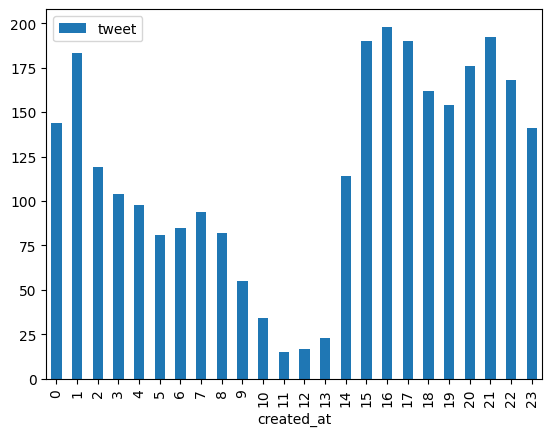

In [232]:
x.plot(kind='bar')

##### By multiple labels (columns)

In [71]:
df.head()

,created_at,tweet,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day,day_hour
id,,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,,1,Wednesday,2,14
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4,Monday,0,20
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"@waltmossberg, @mims, @defcon_5",3,Monday,0,16
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,,1,Monday,0,16
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624,"@DaveLeeBBC, @verge",2,Sunday,6,6


In [228]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [235]:
# here we group based on the values of two columns
# instead of one

df.groupby(['week_day', 'day_hour'])[['tweet']].count().head()

tweet
week_day day_hour       
0        0            11
         1            23
         2            17
         3             7
         4            12

#### Aggregation methods

**Summary**:

- `count`: Number of non-NA values
- `sum`: Sum of non-NA values
- `mean`: Mean of non-NA values
- `median`: Arithmetic median of non-NA values
- `std`, `var`: standard deviation and variance
- `min`, `max`: Minimum and maximum of non-NA values

In [236]:
df['n_mentions'].max()

6

Or also as aggregation functions within a groupby:

In [81]:
df.groupby('week_day').agg(
    {
        # each key in this dict specifies
        # a given column
        'n_mentions':[
            # the list contains aggregation functions
            # to be applied to this column
            'count',
            'mean',
            'min',
            'max',
            'std',
            'var'
        ]
    }
)

n_mentions                                      
              count      mean min max       std       var
week_day                                                 
0               315  1.282540   1   5  0.643077  0.413548
1               385  1.184416   1   6  0.590521  0.348715
2               380  1.168421   1   4  0.474192  0.224858
3               361  1.199446   1   4  0.531350  0.282333
4               530  1.245283   1   5  0.633222  0.400970
5               426  1.166667   1   5  0.497444  0.247451
6               422  1.251185   1   6  0.571231  0.326305

#### Sorting

To sort the values of  a dataframe we use its `sort_values` method:
- `by`: specifies the name of the column to be used for sorting
- `ascending` (default = `True`): specifies whether the sorting should be *ascending* (A-Z, 0-9) or `descending` (Z-A, 9-0) 

In [237]:
# df.sort_values?

In [238]:
df.sort_values(by='created_at', ascending=True).head()

,created_at,tweet,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day,day_hour
id,,,,,,,,
15434727182,2010-06-04 18:31:57,"b'Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.'",https://twitter.com/i/web/status/15434727182,None,0,Friday,4,18
142179928203460608,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT""",https://twitter.com/i/web/status/142179928203460608,None,0,Thursday,3,9
142188458125963264,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...',https://twitter.com/i/web/status/142188458125963264,None,0,Thursday,3,10
142880871391838208,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'",https://twitter.com/i/web/status/142880871391838208,None,0,Saturday,5,8
142881284019060736,2011-12-03 08:22:07,b'That was a total non sequitur btw',https://twitter.com/i/web/status/142881284019060736,None,0,Saturday,5,8


In [239]:
df.sort_values(by='n_mentions', ascending=False).head()

,created_at,tweet,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day,day_hour
id,,,,,,,,
752721031735812096,2016-07-12 04:27:33,"b""@kumailn @RealDaveBarton @JuddApatow @SiliconHBO @FredericLambert @MikeJudge can't wait to see the costume""",https://twitter.com/i/web/status/752721031735812096,"@kumailn, @RealDaveBarton, @JuddApatow, @SiliconHBO, @FredericLambert, @MikeJudge",6,Tuesday,1,4
303244501957365760,2013-02-17 20:48:17,b'RT @LawrenceChanin: @TeslaRoadTrip @avantgame @TEDchris @elonmusk @nytimes \nThe driving public is the winner thanks to the efforts of ...',https://twitter.com/i/web/status/303244501957365760,"@LawrenceChanin, @TeslaRoadTrip, @avantgame, @TEDchris, @elonmusk, @nytimes",6,Sunday,6,20
845289977051148289,2017-03-24 15:03:29,b'@faultywarrior @matt_trulli @FredericLambert @TimShelton @JimPengelly Let me just go fetch my magic wand ...',https://twitter.com/i/web/status/845289977051148289,"@faultywarrior, @matt_trulli, @FredericLambert, @TimShelton, @JimPengelly",5,Friday,4,15
672792504895434753,2015-12-04 15:00:07,"b""RT @WSJLife: Supermodel @KarlieKloss blasts off to the future at @elonmusk's @spacex HQ https://t.co/PfE2bWcQwM @wsjmag https://t.co/zc7QM9\xe2\x80\xa6""",https://twitter.com/i/web/status/672792504895434753,"@WSJLife, @KarlieKloss, @elonmusk, @spacex, @wsjmag",5,Friday,4,15
191005784862236672,2012-04-14 03:31:42,b'RT @SethGreen: My love @ClareGrant & @elonmusk partied with the space cheese on our tour of @SpaceX & @TeslaMotors ...which was AWESO\xe2\x80\xa6 h ...',https://twitter.com/i/web/status/191005784862236672,"@SethGreen, @ClareGrant, @elonmusk, @SpaceX, @TeslaMotors",5,Saturday,5,3


### Save

Before continuing with the plotting, let's save our enhanced dataframe, so that we can come back to it without having to redo the same manipulations on it.

`pandas` provides a number of handy functions to export dataframes in a variety of formats.

Here we use `to_pickle` to serialize the dataframe into a binary format, by using behind the scenes Python's `pickle` library. 

In [ ]:
df.to_pickle("./musk_tweets_enhanced.pkl")

In [240]:
ls -al | grep pkl

-rw-r--r--   1 npedrazzini  staff     622249 Jun 28 16:25 musk_tweets_enhanced.pkl
